In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = r"C:\Users\Sowmi\Downloads\Assignment.xlsx"
excel_data = pd.ExcelFile(file) 

excel_data.sheet_names

['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

In [3]:
user_details = pd.read_excel(file, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file, sheet_name='OrderDetails.csv')

# DATA EXPLORATION

In [37]:
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [39]:
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [41]:
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,5.0,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [13]:
order_details.isnull().sum()

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64

In [15]:
order_details.shape

(16, 10)

In [17]:
user_details.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

In [19]:
user_details.shape

(10, 9)

In [21]:
cooking_sessions.shape

(16, 8)

In [23]:
cooking_sessions.isnull().sum()

Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

# Data cleaning

In [7]:
order_details = pd.merge(order_details, cooking_sessions[['Session ID', 'Session Rating']], on='Session ID', how='left')
order_details['Rating'] = order_details['Rating'].fillna(order_details['Session Rating'].round())
order_details = order_details.drop(columns=['Session Rating']) 

Missing Rating values in OrderDetails were filled with the corresponding rounded Session Rating from CookingSessions by merging two tables by matching column

In [9]:
order_details.isnull().sum()

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64

Now, order details has no null values.

In [11]:
print(user_details.columns)
print(order_details.columns)
print(cooking_sessions.columns)


Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')
Index(['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID'],
      dtype='object')
Index(['Session ID', 'User ID', 'Dish Name', 'Meal Type', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating'],
      dtype='object')


In [21]:
# Strip spaces and standardize column names in all dataframes
user_details.columns = user_details.columns.str.strip()
cooking_sessions.columns = cooking_sessions.columns.str.strip()
order_details.columns = order_details.columns.str.strip()

merged_sessions_orders = pd.merge(cooking_sessions, order_details, on='Session ID', how='left')

In [23]:
merged_sessions_orders.head()

,Session ID,User ID_x,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,User ID_y,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,5.0
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0


In [25]:
merged_sessions_orders = merged_sessions_orders.drop(columns=['User ID_y'])

merged_sessions_orders = merged_sessions_orders.rename(columns={'User ID_x': 'User ID'})

user_activity = pd.merge(merged_sessions_orders, user_details, on='User ID', how='left')
user_activity.head(16)

,Session ID,User ID,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,...,Time of Day,Rating,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,2024-12-01,...,Night,5.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,2024-12-01,...,Day,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,2024-12-02,...,Night,5.0,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,2024-12-02,...,Morning,4.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,2024-12-03,...,Day,4.0,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,2024-12-03,...,Night,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,1007,2024-12-04,...,Night,4.0,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,1008,2024-12-04,...,Day,4.0,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,2024-12-05,...,Night,5.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,1010,2024-12-05,...,Morning,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8


In [27]:
user_activity.shape

(16, 24)

In [29]:
user_activity.columns

Index(['Session ID', 'User ID', 'Dish Name_x', 'Meal Type_x', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating', 'Order ID',
       'Order Date', 'Meal Type_y', 'Dish Name_y', 'Order Status',
       'Amount (USD)', 'Time of Day', 'Rating', 'User Name', 'Age', 'Location',
       'Registration Date', 'Phone', 'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')

In [31]:
for col in user_activity.columns:
    if col.endswith('_x'):
        y_col = col.replace('_x', '_y')
        if y_col in user_activity.columns:
            user_activity = user_activity.drop(columns=[y_col])

user_activity = user_activity.rename(columns=lambda x: x.replace('_x', '') if x.endswith('_x') else x)
print(user_activity.head())

  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  Order ID Order Date  \
0 2024-12-01 19:30:00               30             4.5      1001 2024-12-01   
1 2024-12-01 12:20:00               20             4.0      1002 2024-12-01   
2 2024-12-02 20:10:00               40             4.8      1003 2024-12-02   
3 2024-12-02 08:00:00               30             4.2      1004 2024-12-02   
4 2024-12-03 13:15:00               15             4.7      1005 2024-12-03   

   ... Time of Day  Rating      User Name  Age       Location  \
0  ...       Night     5.0 

In [33]:
pd.set_option('display.max_columns', None)

In [35]:
user_activity.head(17)

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Order Status,Amount (USD),Time of Day,Rating,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,2024-12-01,Completed,15.0,Night,5.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,2024-12-01,Completed,10.0,Day,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,2024-12-02,Canceled,12.5,Night,5.0,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,2024-12-02,Completed,8.0,Morning,4.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,2024-12-03,Completed,9.0,Day,4.0,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,2024-12-03,Completed,14.0,Night,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,1007,2024-12-04,Completed,13.5,Night,4.0,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,1008,2024-12-04,Canceled,11.0,Day,4.0,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,2024-12-05,Completed,12.0,Night,5.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,1010,2024-12-05,Completed,7.0,Morning,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8


In [39]:
user_activity.drop('Rating', axis=1, inplace=True)

In [41]:
user_activity.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Order Status,Amount (USD),Time of Day,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,2024-12-01,Completed,15.0,Night,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,2024-12-01,Completed,10.0,Day,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,2024-12-02,Canceled,12.5,Night,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,2024-12-02,Completed,8.0,Morning,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,2024-12-03,Completed,9.0,Day,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10


In [43]:
user_activity.isnull().sum()

Session ID           0
User ID              0
Dish Name            0
Meal Type            0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
Order ID             0
Order Date           0
Order Status         0
Amount (USD)         0
Time of Day          0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

In [46]:
user_activity.to_excel("user_activity.xlsx", index=False)

print("DataFrame saved to 'user_activity.xlsx'")

DataFrame saved to 'user_activity.xlsx'


# EDA

In [50]:
print(user_activity.describe())

                    Session Start                    Session End  \
count                          16                             16   
mean   2024-12-05 02:50:37.500000  2024-12-05 03:20:56.249999872   
min           2024-12-01 12:00:00            2024-12-01 12:20:00   
25%           2024-12-03 08:37:30            2024-12-03 08:58:45   
50%           2024-12-05 00:30:00            2024-12-05 00:57:30   
75%           2024-12-06 23:22:30            2024-12-07 00:00:00   
max           2024-12-08 19:30:00            2024-12-08 20:10:00   
std                           NaN                            NaN   

       Duration (mins)  Session Rating     Order ID           Order Date  \
count        16.000000       16.000000    16.000000                   16   
mean         30.312500        4.518750  1008.500000  2024-12-04 12:00:00   
min          10.000000        4.000000  1001.000000  2024-12-01 00:00:00   
25%          20.000000        4.300000  1004.750000  2024-12-02 18:00:00   
50%    

 # Average session rating for completed orders

In [53]:
avg_rating = user_activity[user_activity['Order Status'] == 'Completed']['Session Rating'].mean()
print(f"Average session rating for completed orders: {avg_rating}")

Average session rating for completed orders: 4.507142857142857


# popular dishes ordered

In [60]:
popular_dishes = user_activity['Dish Name'].value_counts()
print("Top 5 most ordered dishes:\n", popular_dishes.head())

Top 5 most ordered dishes:
 Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Name: count, dtype: int64


# Visualizing the trend by dish

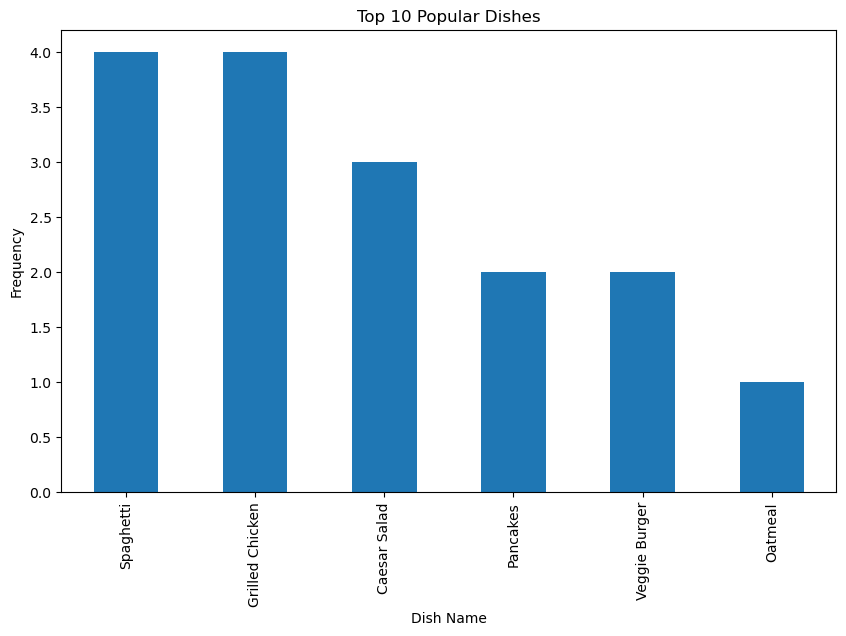

In [63]:
popular_dishes.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.show()

# Users based on age

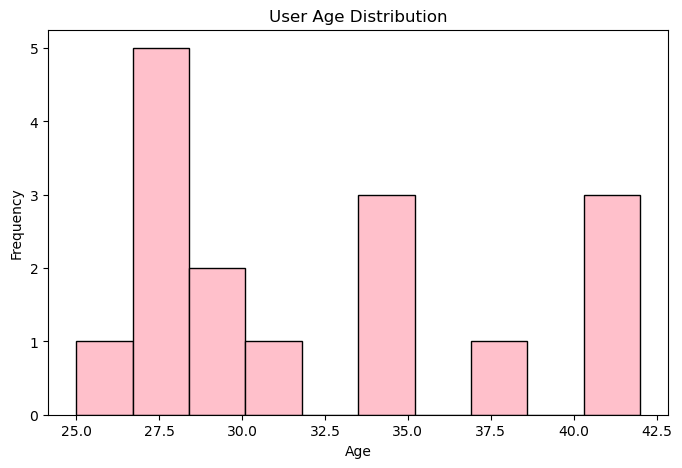

In [70]:
user_activity['Age'].plot(kind='hist', bins=10, figsize=(8, 5), color='pink', edgecolor='black')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Revenue per user

In [73]:
user_revenue = user_activity.groupby('User ID')['Amount (USD)'].sum()
print("\nRevenue per User:\n", user_revenue.sort_values(ascending=False))


Revenue per User:
 User ID
U001    35.0
U003    32.0
U002    31.0
U005    22.5
U004    21.5
U007    14.0
U006    13.0
U008    11.0
Name: Amount (USD), dtype: float64


# Revenue by time of day


Meal Timing Preferences:
 Time of Day  Day  Morning  Night
Meal Type                       
Breakfast      0        3      0
Dinner         0        0      8
Lunch          5        0      0


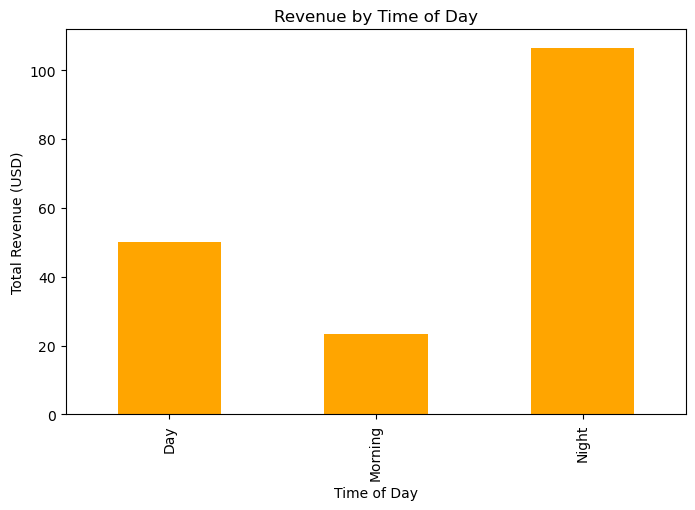

In [78]:
meal_time_trend = pd.crosstab(user_activity['Meal Type'], user_activity['Time of Day'])
print("\nMeal Timing Preferences:\n", meal_time_trend)

time_revenue = user_activity.groupby('Time of Day')['Amount (USD)'].sum()
time_revenue.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Revenue by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Revenue (USD)')
plt.show()

#  Meal type distribution by location


Meal Preferences by Location:
 Meal Type      Breakfast  Dinner  Lunch
Location                               
Austin                 0       1      0
Boston                 0       1      0
Chicago                1       1      1
Los Angeles            1       1      1
Miami                  0       0      1
New York               1       2      0
San Francisco          0       1      1
Seattle                0       1      1


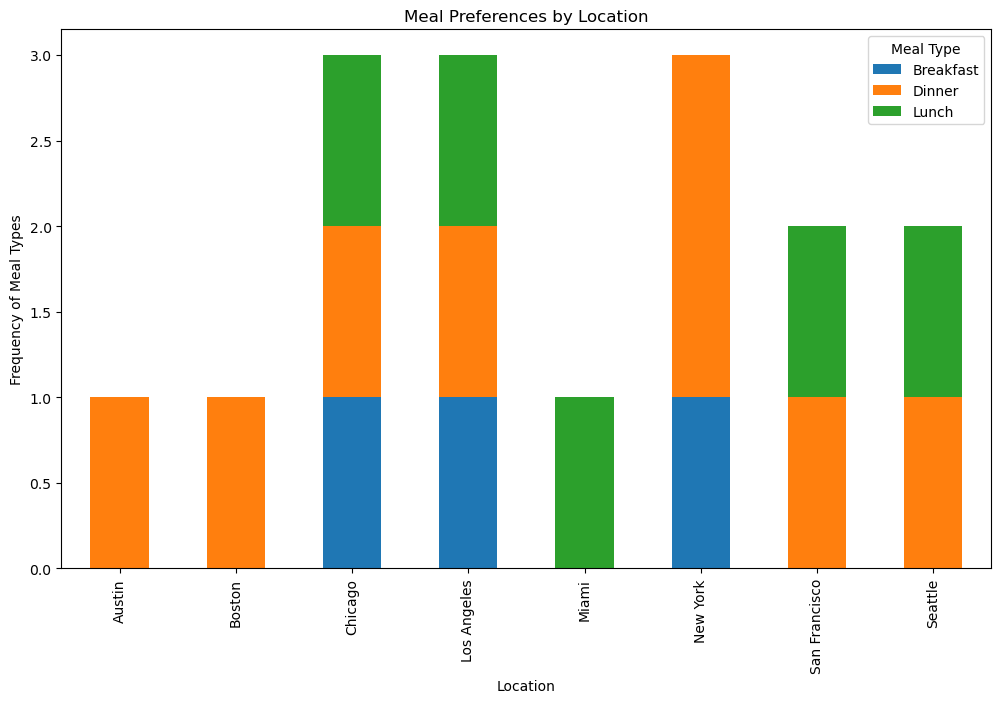

In [84]:
meal_location = pd.crosstab(user_activity['Location'], user_activity['Meal Type'])
print("\nMeal Preferences by Location:\n", meal_location)

meal_location.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Meal Preferences by Location')
plt.xlabel('Location')
plt.ylabel('Frequency of Meal Types')
plt.show()

<Figure size 1000x600 with 0 Axes>

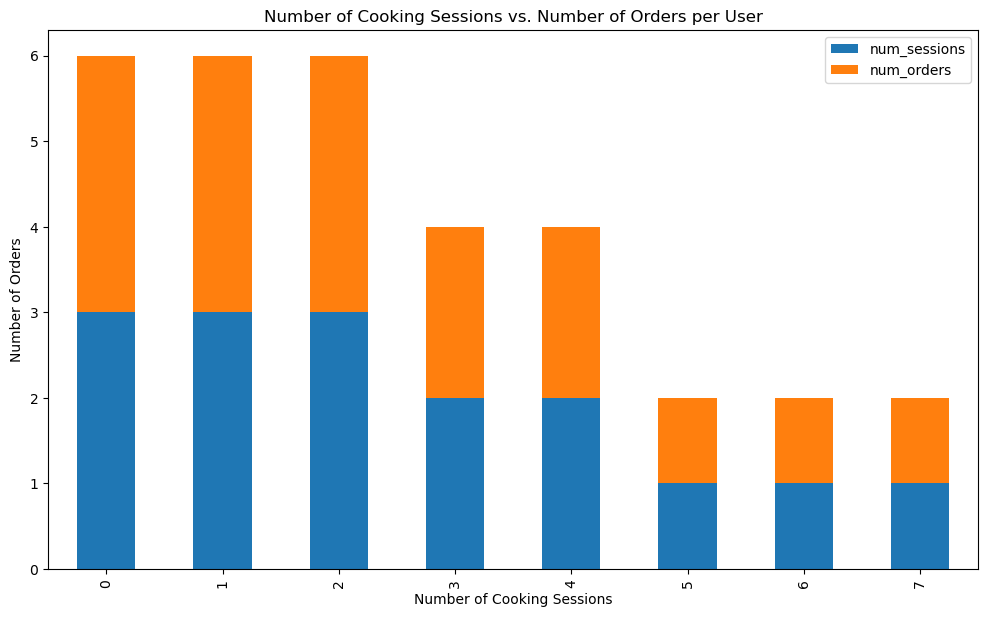

In [93]:
user_session_order_count = user_activity.groupby('User ID').agg(
    num_sessions=('Session ID', 'nunique'),
    num_orders=('Order ID', 'nunique')
).reset_index()

# Visualize the relationship between sessions and orders
plt.figure(figsize=(10, 6))
user_session_order_count.plot(kind='bar', stacked=True, figsize=(12, 7))

# sns.scatterplot(data=user_session_order_count, x='num_sessions', y='num_orders')
plt.title('Number of Cooking Sessions vs. Number of Orders per User')
plt.xlabel('Number of Cooking Sessions')
plt.ylabel('Number of Orders')
plt.show()

In this notebook, we analyzed user engagement and revenue generation for Upliance.ai's Cooking Assistant. The analysis focused on user behavior, cooking session duration, order trends, and demographic insights.

We found that the 25-34 age group exhibits the highest engagement, and popular dishes like Spaghetti and Grilled Chicken generate significant revenue. The session ratings and order completion rate indicate that enhancing the cooking session experience will lead to better user retention and higher orders.